In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas 
import os
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import scale
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
import math

In [2]:
#leitura da base e definição dos campos utilizados
baseTotalAtributos = pandas.read_csv (r"C:\Users\Gerson\Desktop\EP2_ia2019\dataset_5secondWindow%5B3%5D.csv", usecols =  ["time","android.sensor.accelerometer#mean","android.sensor.linear_acceleration#mean","android.sensor.orientation#mean","speed#mean"])
baseTotalClasse = pandas.read_csv (r"C:\Users\Gerson\Desktop\EP2_ia2019\dataset_5secondWindow%5B3%5D.csv", usecols = ["target"])
                          

print(baseTotalClasse['target'].unique())

['Still' 'Car' 'Train' 'Bus' 'Walking']


In [21]:
#normalização via padronização 

colunas =  list(baseTotalAtributos.columns)

baseTotalAtributosNorm = baseTotalAtributos.copy()
baseTotalAtributosNorm[colunas] = baseTotalAtributos[colunas].apply(scale)

In [22]:
#particionamento da base 70 % para o conjunto de teste e 30 % para o conjunto de treinamento

baseTreinoNorm,  baseTesteNorm , classeTreinoNorm, classeTesteNorm = train_test_split(baseTotalAtributosNorm, baseTotalClasse, test_size = 0.3 , train_size = 0.7, random_state = 0)
baseTreinoNaoNorm,  baseTesteNaoNorm , classeTreinoNaoNorm, classeTesteNaoNorm = train_test_split(baseTotalAtributos, baseTotalClasse, test_size = 0.3 , train_size = 0.7, random_state = 0)

In [5]:
def dist_euclidiana(exemploTeste ,exemploTreinamento):
    dim, soma = len(exemploTreinamento),0
    for i in range(dim):
        soma += math.pow(exemploTreinamento[i] - exemploTeste[i], 2)
    return math.sqrt(soma)      
    

In [6]:
def dist_manhattan(exemploTeste,exemploTreinamento):
    dim,soma = len(exemploTreinamento),0
    for i in range(dim):
        soma += abs(exemploTeste[i]-exemploTreinamento[i])
    return soma

In [7]:
def votacaoKNN (listaDeDistancia,k):
    
    listaClasses = []
    
    # obtém as chaves (índices) dos k-vizinhos mais próximos, por default a ordenação é crescente
    k_vizinhos = sorted(listaDeDistancia, key=listaDeDistancia.get)[:k]
    
    #identifica as classes dos k vizinhos mais próximos e insere na listaClasses
    for indice in k_vizinhos:
            listaClasses.append(baseTotalClasse['target'][indice])
            
    #contabiliza para os k elementos a quantidade de classes identificadas 
    unique_elements, counts_elements = np.unique(listaClasses, return_counts=True )    
    
    #através do np.argmax é identificado o ídice que representa o maior valor( que significa a quantidade de vezes 
    #que a classe está presente no vetor) ,este índice é aproveitado para identificar no array 
    #"unique_elements" qual a classe escolhida 
    
    listaClasses.clear()
    return unique_elements[np.argmax(counts_elements)] 
 

In [8]:
def KNNmetodo(dataSetTreino,dataSetTeste,k):
    dicDistEuclid = {}
    dicDistManhat ={}
    
    dicResultadoEuclid = {}
    dicResultadoManhat = {}
    
    for indexTeste , exemploTeste in dataSetTeste.iterrows():
        
        for indexTreinamento,exemploTreinamento in  dataSetTreino.iterrows():
            dist_eucli = dist_euclidiana(exemploTeste,exemploTreinamento)
            dist_manhat = dist_manhattan(exemploTeste,exemploTreinamento)

            dicDistEuclid[indexTreinamento] = dist_eucli
            dicDistManhat[indexTreinamento] = dist_manhat
            
        #votação
        
        dicResultadoEuclid[indexTeste] =votacaoKNN(dicDistEuclid,k)
        dicResultadoManhat[indexTeste] =votacaoKNN(dicDistManhat,k)
     
    return dicResultadoEuclid , dicResultadoManhat , dataSetTeste
        

In [13]:


dicClassificadosEuclid, dicClassificadosManhat , setTeste= KNNmetodo(baseTreinoNaoNorm,baseTesteNaoNorm,3)


In [13]:

def AcuraciaKNN(setTeste, dicClassificadosEuclid, dicClassificadosManhat):
    acertosEuclid = 0
    acertosManhat = 0

    for i , exemploTeste in setTeste.iterrows():
        if(classeTesteNaoNorm["target"][i] ==dicClassificadosEuclid[i] ):
            acertosEuclid += 1
        if(classeTesteNaoNorm["target"][i] ==dicClassificadosManhat[i] ):
            acertosManhat +=1

   # print (acertosManhat/len(setTeste), acertosEuclid/len(setTeste) )
    
    return acertosManhat/len(setTeste) , acertosEuclid/len(setTeste) 
        

In [19]:
#1º Questão KNN
AcuraciaKNN(setTeste, dicClassificadosEuclid, dicClassificadosManhat )

(0.6923076923076923, 0.6628959276018099)

In [11]:
def AcuraciaVSk(baseTreino,baseTeste, k):
    
    listaEuclid = {}
    listaManhatt = {}
    for i in range(k):
        print("iteração:" + str (i+1))
        dicClassificadosEuclid, dicClassificadosManhat , setTeste =  KNNmetodo(baseTreino,baseTeste[:800],i+1)
        manhatt ,  euclid = AcuraciaKNN(setTeste,dicClassificadosEuclid , dicClassificadosManhat)
        print(euclid,manhatt)
        listaEuclid[i+1]=euclid
        listaManhatt[i+1] = manhatt
    
    return listaEuclid, listaManhatt
        
        

iteração:1
0.7075 0.71875
iteração:2
0.645 0.65125
iteração:3
0.6475 0.6725
iteração:4
0.63125 0.6425
iteração:5
0.61875 0.64125
iteração:6
0.61375 0.65125
iteração:7
0.60375 0.64625
iteração:8
0.5975 0.6325
iteração:9
0.6 0.64625
iteração:10
0.5875 0.63125


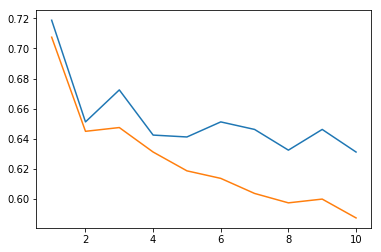

In [56]:
#2ºQuestão KNN 
listaDistEuclid,listaDistManhatt = AcuraciaVSk(baseTreinoNaoNorm,baseTesteNaoNorm,10)

x1, y1 = zip(*sorted(listaDistManhatt.items()) )
x2, y2 = zip(*sorted(listaDistEuclid.items()) )

plt.plot(x1, y1)
plt.plot(x2, y2)

In [23]:
#3º Questão KNN com k = 1

dicClassificadosEuclid, dicClassificadosManhat , setTeste= KNNmetodo(baseTreinoNorm,baseTesteNorm,1)

In [14]:

#testando a acurácia com k = 1 
AcuraciaKNN(setTeste, dicClassificadosEuclid, dicClassificadosManhat )

(0.7782805429864253, 0.7641402714932126)